# 💳 Loan Approval Prediction  

---

## 📌 Project Overview  
This project predicts whether a loan application will be **approved** based on applicant details and financial history.  

✨ **Goal** → Assist **financial institutions** in making **faster, smarter, and data-driven** loan approval decisions.  

---

## 🎯 Objectives

Analyze applicant data such as income, credit history, and loan purpose.

Build machine learning models to predict loan approval.

Evaluate model performance using standard metrics.

---

## Given



| Feature               | Type                        | Category              | Description                                                                                                                    |
| --------------------- | --------------------------- | --------------------- | ------------------------------------------------------------------------------------------------------------------------------ |
| **credit.policy**     | Binary (0/1)                | 🎯 Target             | `1` if customer meets credit criteria, `0` otherwise.                                                                          |
| **purpose**           | Categorical                 | 📝 Loan Info          | Loan purpose: `"credit_card"`, `"debt_consolidation"`, `"educational"`, `"major_purchase"`, `"small_business"`, `"all_other"`. |
| **int.rate**          | Numeric (float, proportion) | 📝 Loan Info          | Loan interest rate (e.g., `0.11` = 11%). Higher = riskier borrower.                                                            |
| **installment**       | Numeric (float)             | 📝 Loan Info          | Monthly loan payment owed by borrower.                                                                                         |
| **log.annual.inc**    | Numeric (log-transformed)   | 👤 Borrower Profile   | Natural log of annual income. Higher = better repayment ability.                                                               |
| **dti**               | Numeric (float)             | 👤 Borrower Profile   | Debt-to-Income ratio = (Debt ÷ Income). High = risky.                                                                          |
| **fico**              | Numeric (integer)           | 👤 Borrower Profile   | FICO score (300–850). Higher = more creditworthy.                                                                              |
| **days.with.cr.line** | Numeric (integer)           | 📅 Credit History     | Number of days borrower has had a credit line. Longer = more reliable history.                                                 |
| **revol.bal**         | Numeric (integer)           | 💳 Credit Utilization | Outstanding revolving balance (unpaid credit card debt).                                                                       |
| **revol.util**        | Numeric (float, %)          | 💳 Credit Utilization | Credit utilization = (Balance ÷ Credit Limit). High (>30%) = red flag.                                                         |
| **inq.last.6mths**    | Numeric (integer)           | 📅 Credit History     | Number of credit inquiries in past 6 months. Many = riskier.                                                                   |
| **delinq.2yrs**       | Numeric (integer)           | 📅 Credit History     | Times borrower was 30+ days late in last 2 years.                                                                              |
| **pub.rec**           | Numeric (integer)           | 📅 Credit History     | Public derogatory records (bankruptcy, liens, judgments). Even 1 is risky.                                                     |


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt,seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('/kaggle/input/loan-data/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
X = df.drop(['credit.policy','not.fully.paid'],axis=1)
y = df['credit.policy']
categorical_cols = ['purpose']
num_cols = [col for col in X.columns if col not in categorical_cols]

## preprocessing

In [5]:
preprocessor =ColumnTransformer([
    ('num','passthrough',num_cols),
    ('cat',OneHotEncoder(),categorical_cols)
])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [8]:
X_train.shape

(6704, 18)

## Model

In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Accuracy
print("Train accuracy:", rf_model.score(X_train, y_train))
print("Test accuracy:", rf_model.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.9878218510786361


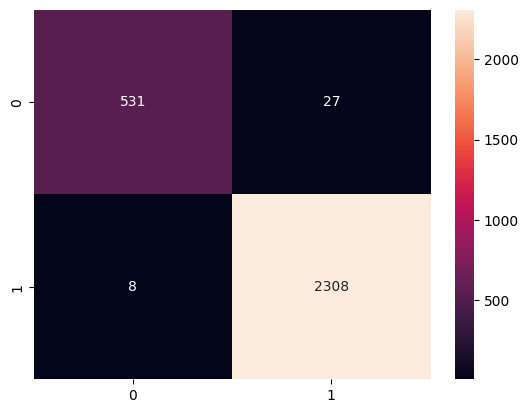

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [11]:
y_test.value_counts()

credit.policy
1    2316
0     558
Name: count, dtype: int64

In [12]:
cm

array([[ 531,   27],
       [   8, 2308]])

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       558
           1       0.99      1.00      0.99      2316

    accuracy                           0.99      2874
   macro avg       0.99      0.97      0.98      2874
weighted avg       0.99      0.99      0.99      2874



In [14]:
import joblib

joblib.dump(rf_model, "LoanApproval.pkl")


model = joblib.load("LoanApproval.pkl")


In [15]:
joblib.dump(preprocessor, "preprocessor.pkl")


preprocessor = joblib.load('preprocessor.pkl')

In [16]:
user_input = {
    'purpose': 'debt_consolidation',
    'int.rate': 0.0894,
    'installment': 460.69,
    'log.annual.inc': 11.512925,
    'dti': 6.54,
    'fico': 762,
    'days.with.cr.line': 6930.0,
    'revol.bal': 7563,
    'revol.util': 30.0,
    'inq.last.6mths': 0,
    'delinq.2yrs': 0,
    'pub.rec': 0,
    'not.fully.paid':0
}
input_df = pd.DataFrame([user_input])
input_transformed = preprocessor.transform(input_df)
prediction = model.predict(input_transformed)
if prediction[0]==1 :
    p = "Approved"
elif prediction[0]==0:
    p = "Not Approved"
print("Predicted credit policy:",p )


Predicted credit policy: Approved
